In [1]:
%matplotlib inline
import numpy as np
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile('EPIC 212593538', author="K2", campaign=6).download()
tpf.shape

(3545, 8, 8)

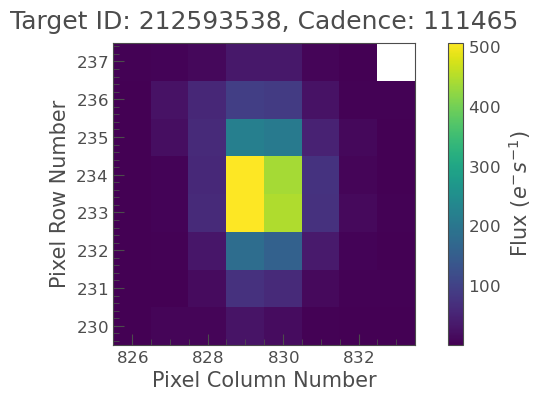

In [2]:
tpf.plot(frame=100);

In [3]:
postage_stamp_mask = tpf.hdu[2].data > 0
postage_stamp_mask.sum()

63

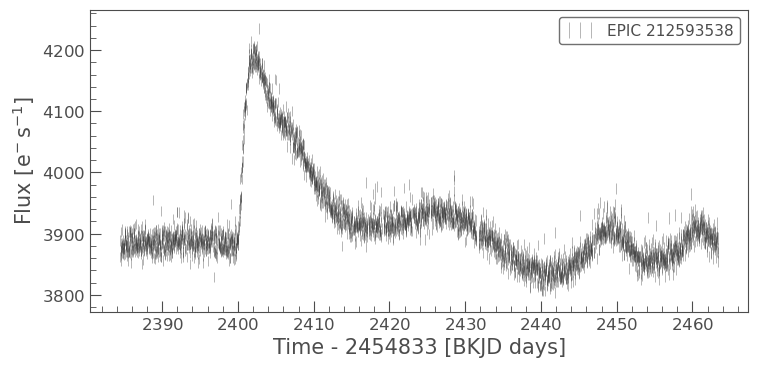

In [4]:
lc_raw = tpf.to_lightcurve(aperture_mask='all')
_, spurious_cadences = lc_raw.flatten().remove_outliers(return_mask=True)
lc_clean = lc_raw[~spurious_cadences]
lc_clean.errorbar(alpha=0.5, normalize=False);

In [5]:
aperture_mask = postage_stamp_mask.copy()
aperture_mask[:,-1] = False #custom aperture photometry
aperture_mask[:,0] = False
background_mask = ~aperture_mask & postage_stamp_mask #creating background mask
N_targ_pixels, N_back_pixels = aperture_mask.sum(), background_mask.sum() #isolating target from background
N_targ_pixels, N_back_pixels

(48, 15)

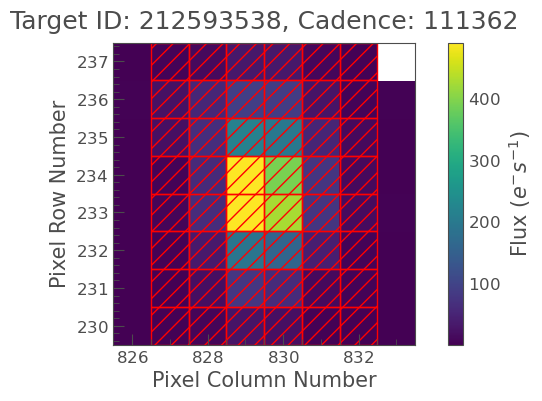

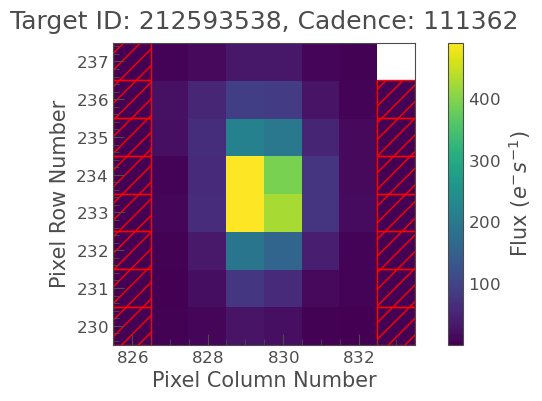

In [6]:
tpf.plot(aperture_mask=aperture_mask);
tpf.plot(aperture_mask=background_mask);

In [7]:
lc_aper = tpf.to_lightcurve(aperture_mask=aperture_mask) # applying aperture to lightcurve
lc_back_per_pixel = tpf.to_lightcurve(aperture_mask=background_mask) / N_back_pixels  
lc_net = lc_aper - lc_back_per_pixel.flux * N_targ_pixels

In [8]:
lc_net = lc_net[~spurious_cadences] #Dropping the previously-identified spurious cadences

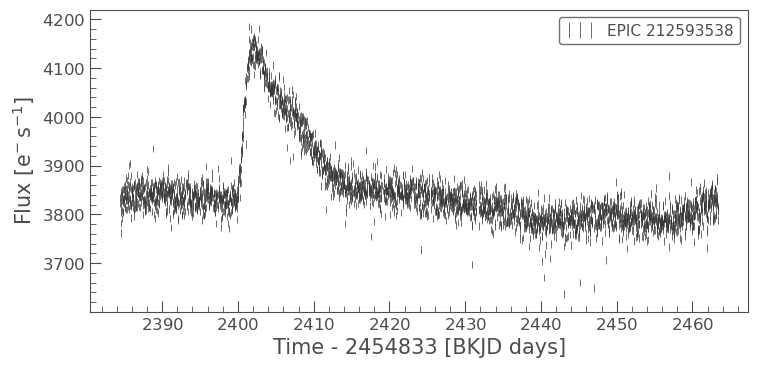

In [9]:
lc_net.errorbar();